In [2]:
## load modules
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

/Users/jeromesauer/neuefische/Project2_AirQuality/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
## helper functions

# covert feature data: from string to list of values for all observation sets 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)

def aggregate_features(x,col_name):
    x["mean_" + col_name] = x[col_name].apply(np.nanmean)
    x["max_" + col_name] = x[col_name].apply(np.nanmax)
    x["min_" + col_name] = x[col_name].apply(np.nanmin)
    x["std_" + col_name] = x[col_name].apply(np.nanstd)
    x["var_" + col_name] = x[col_name].apply(np.nanvar)
    x["median_" + col_name] = x[col_name].apply(np.nanmedian)
    #x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  

# # remove np.nan values
# def remove_nan_values(x):
#     return [e for e in x if not math.isnan(e)]

def cut_data(x,ind_min,ind_max):
    return x[ind_min:ind_max+1]

def select_day(index_min,index_max):
    if index_max == 23:
        day = '1'
    elif index_min == 24 and index_max == 47:
        day = '2'
    elif index_min == 48 and index_max == 71:
        day = '3' 
    elif index_min == 72 and index_max == 95:
        day = '4'
    elif index_min == 72 and index_max == 121:
        day = '4_5'    
    elif index_min == 48 and index_max == 121:
        day = '3_4_5'    
    else:
        day = '5'  
    return day                        

# only select data of a particular lead-day
def aggregate_features_advanced(x,col_name,index_min,index_max):
    day = str(select_day(index_min,index_max))
    x["mean_" + day + "_" + col_name] = x[col_name].apply(lambda y: cut_data(y,index_min,index_max))
    x["mean_" + day + "_" + col_name] = x["mean_" + day + "_" + col_name].apply(np.nanmean)
    return x    

In [4]:
# define features
features = ["temp","precip","rel_humidity","wind_dir","wind_spd"]

In [5]:
# read meta data
meta_data = pd.read_csv('data/airqo_metadata.csv')
meta_data.rename(columns={'Unnamed: 0':'index'},inplace=True)
meta_data.head()

,index,location,loc_altitude,km2,aspect,dist_motorway,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,0,A,1122.4,1.9,194.0,NaN,NaN,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
1,1,B,1155.4,5.4,219.8,NaN,528.078476,2172.680462,1144.376412,531.103271,65.142004,1.042809,22243,5735,116,1144,239
2,2,C,1178.3,8.5,168.7,NaN,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
3,3,D,980.8,0.8,90.0,NaN,NaN,265.896472,NaN,339.693908,76.024389,11.601442,3596,663,7,651,99
4,4,E,1186.5,1.6,121.0,NaN,850.423131,NaN,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43


In [6]:
# read train data
data = pd.read_csv('data/train.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            15539 non-null  object 
 1   location      15539 non-null  object 
 2   temp          15539 non-null  object 
 3   precip        15539 non-null  object 
 4   rel_humidity  15539 non-null  object 
 5   wind_dir      15539 non-null  object 
 6   wind_spd      15539 non-null  object 
 7   atmos_press   15539 non-null  object 
 8   target        15539 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [7]:
# convert big string to a list of floats in every observation set
for feature in features : 
    data[feature] = data[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])    

In [8]:
# multiply temperature nad precipitation
new_df = pd.DataFrame(columns=['precip_temp'],index=data.index)
for ind in data.index:
    new_df.loc[ind,'precip_temp'] = (list(np.array(data['precip'].loc[ind]) * np.array(data['temp'].loc[ind])))
data = pd.concat((data,new_df),axis=1)


In [9]:
data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,precip_temp
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702,"[2.29839999966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304,"[0.0, 0.0, 0.0, 2.69535, 3.00446666712, 0.0, 0..."
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 157.2..."
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [10]:
# calculate mean of features dependent on lead day
for feature in features + ['precip_temp']:
    data = aggregate_features(data,feature)   
    for ind_range in [(0,23),(24,47),(48,71),(72,95),(96,121),(72,121),(48,121)]:
        data = aggregate_features_advanced(data,feature,ind_range[0],ind_range[1]) 
data.head()          

/Users/jeromesauer/neuefische/Project2_AirQuality/.venv/lib/python3.9/site-packages/pandas/core/apply.py:1099: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(


,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,precip_temp,...,std_precip_temp,var_precip_temp,median_precip_temp,mean_1_precip_temp,mean_2_precip_temp,mean_3_precip_temp,mean_4_precip_temp,mean_5_precip_temp,mean_4_5_precip_temp,mean_3_4_5_precip_temp
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",...,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702,"[2.29839999966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1.109609,1.231233,0.0,0.189054,0.000000,0.052399,0.000000,0.481338,0.245581,0.182069
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304,"[0.0, 0.0, 0.0, 2.69535, 3.00446666712, 0.0, 0...",...,17.372853,301.816005,0.0,8.751985,7.625265,0.000000,0.000000,0.000000,0.000000,0.000000
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 157.2...",...,68.915505,4749.346830,0.0,9.537275,2.963313,19.322558,71.496791,2.201859,36.142234,30.612477
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0.512672,0.262832,0.0,0.135221,0.000000,0.000000,NaN,NaN,NaN,0.000000


In [11]:
# remove rows with NaN values in aggregated data
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14648 entries, 1 to 15538
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14648 non-null  object 
 1   location                 14648 non-null  object 
 2   temp                     14648 non-null  object 
 3   precip                   14648 non-null  object 
 4   rel_humidity             14648 non-null  object 
 5   wind_dir                 14648 non-null  object 
 6   wind_spd                 14648 non-null  object 
 7   atmos_press              14648 non-null  object 
 8   target                   14648 non-null  float64
 9   precip_temp              14648 non-null  object 
 10  mean_temp                14648 non-null  float64
 11  max_temp                 14648 non-null  float64
 12  min_temp                 14648 non-null  float64
 13  std_temp                 14648 non-null  float64
 14  var_temp              

site D: 4976 observations
site A: 4539 observations
site E: 2785 observations
site C: 1694 observations
site B: 654 observations


Text(0.5, 0, 'target [$\\mathregular{µg m^{-3}}$]')

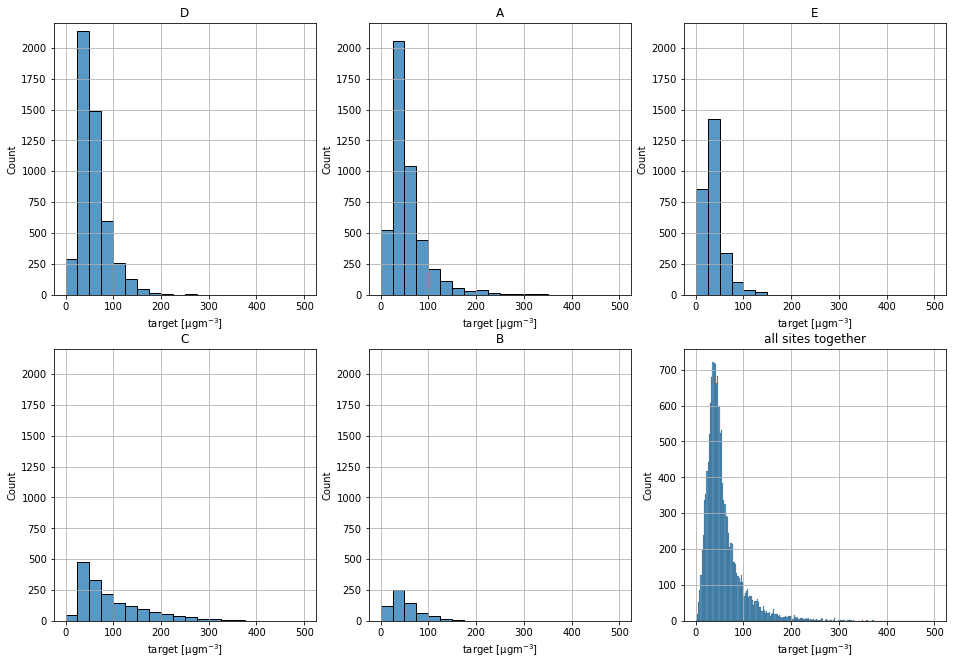

In [12]:
# look at histograms of target variable for the five different stations and aggregated over all five stations
# also print the respective number of observations
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,11))
ax = np.reshape(ax,6)
bins = np.arange(0,501,25)

for i,site in enumerate(data['location'].unique()):
    print(f"site {site}: {len(data[data['location']==site])} observations")
    sns.histplot(x='target',data=data[data['location']==site],ax=ax[i],bins=bins)
    ax[i].set_title(site)
    ax[i].grid()
    ax[i].set_ylim([0,2200])
    ax[i].set_xlabel('target [$\mathregular{µg m^{-3}}$]')
sns.histplot(x='target',data=data,ax=ax[-1],bins=np.arange(0,501,2.5))    
ax[-1].set_title('all sites together') 
ax[-1].grid() 
ax[-1].set_xlabel('target [$\mathregular{µg m^{-3}}$]') 

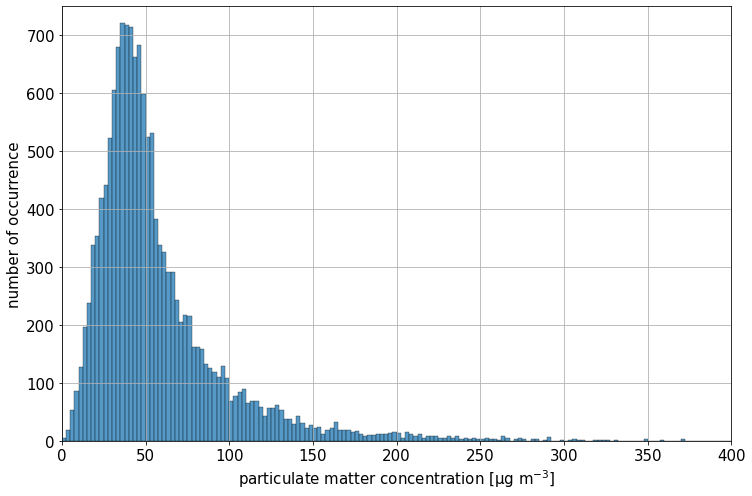

In [24]:
# look at histogram of target variable aggregated over all five stations
# also print the respective number of observations
fontsize=15
fig,ax = plt.subplots(figsize=(12,8))
bins = np.arange(0,501,2.5)
sns.histplot(x='target',data=data,ax=ax,bins=bins)
ax.grid()
ax.set_ylim([0,750])
ax.set_xlim([0,400])
ax.set_xlabel('particulate matter concentration [$\mathregular{µg\ m^{-3}}$]',fontsize=fontsize) 
ax.set_ylabel('number of occurrence',fontsize=fontsize)
ax.tick_params(axis='both',labelsize=fontsize)

Text(0.5, 1.0, 'data of all sites')

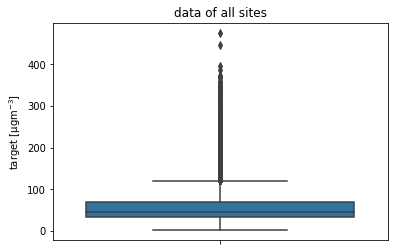

In [360]:
# distribution of aggregated target variable in boxplot
fig,ax = plt.subplots() 
sns.boxplot(y='target',data=data,ax=ax)
ax.set_ylabel('target [$\mathregular{µgm^{-3}}$]')
ax.set_title('data of all sites')

In [361]:
# take mean features for data analysis
features = ["mean_" + feature for feature in features]

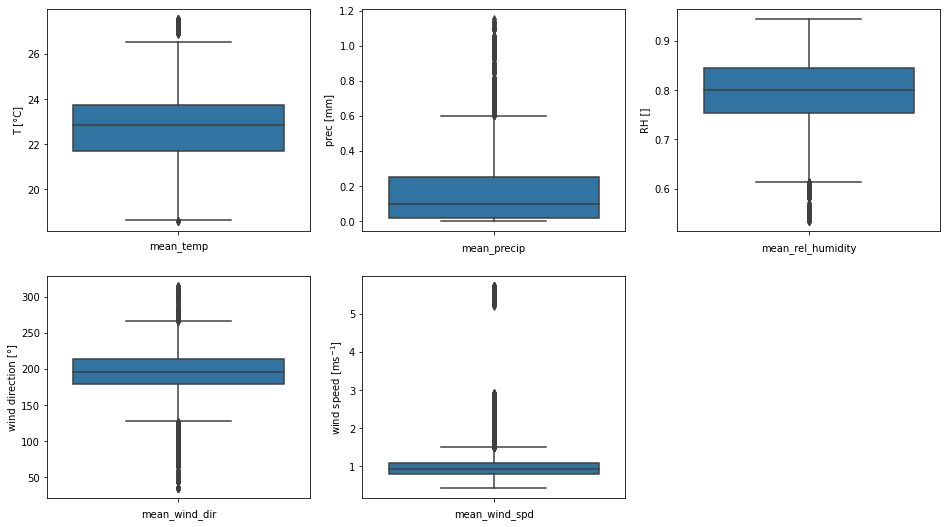

In [362]:
# look at distributions of mean features
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(16,9))
ax = np.reshape(ax,6)
units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]']

for i,feature in enumerate(['mean_temp','mean_precip','mean_rel_humidity','mean_wind_dir','mean_wind_spd']):
    sns.boxplot(y=data[feature],ax=ax[i]) 
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel(units[i])
ax[-1].remove() 


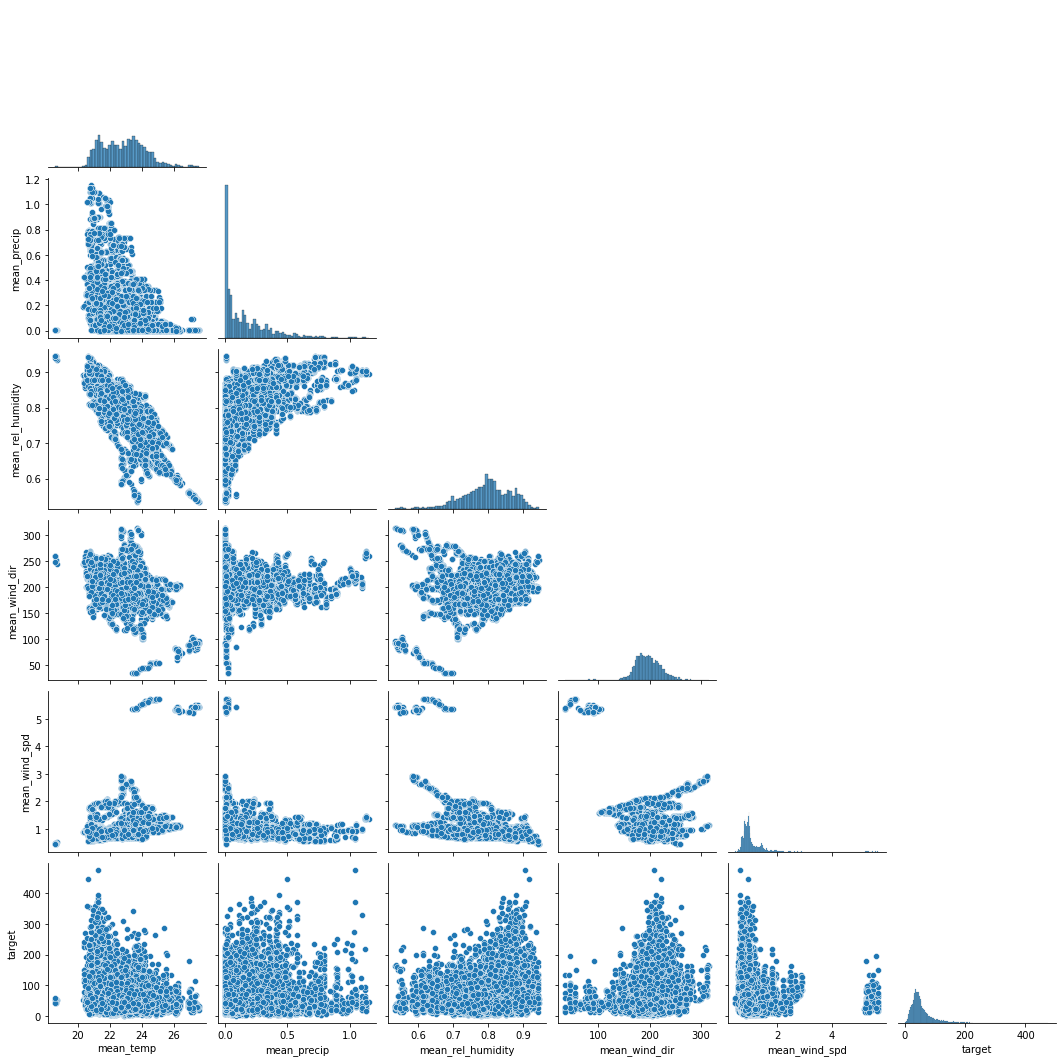

In [27]:
sns.pairplot(data[['mean_temp','mean_precip','mean_rel_humidity','mean_wind_dir','mean_wind_spd','target']],corner=True)

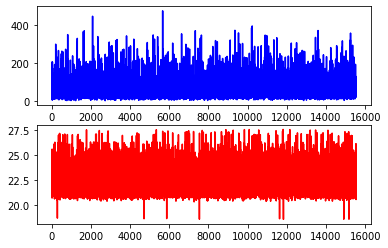

In [32]:
fig,ax=plt.subplots(nrows=2,ncols=1,squeeze=False)
ax=np.reshape(ax,2)
ax[0].plot(data['target'],'b')
ax[1].plot(data['mean_temp'],'r')

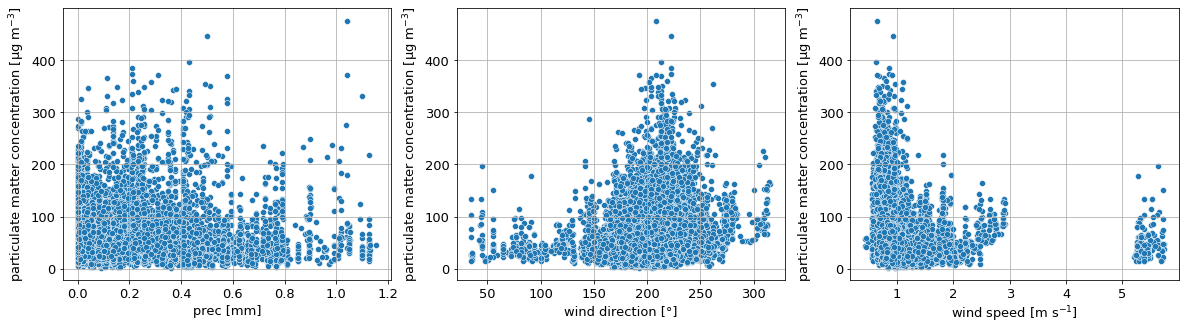

In [44]:
# scatterplots between target and feature variables
fig,ax = plt.subplots(nrows=1,ncols=3,squeeze=False,figsize=(20,5))
ax = np.reshape(ax,3)
units = ['prec [mm]','wind direction [°]','wind speed [$\mathregular{m\ s^{-1}}}$]']
fontsize = 13

for i,feature in enumerate(['mean_precip','mean_wind_dir','mean_wind_spd']):
    sns.scatterplot(x=data[feature], y=data['target'], ax=ax[i])
    ax[i].grid()
    ax[i].set_ylabel('particulate matter concentration [$\mathregular{µg\ m^{-3}}$]',fontsize=fontsize)
    ax[i].set_xlabel(units[i],fontsize=fontsize)
    ax[i].tick_params(axis='both',labelsize=fontsize)


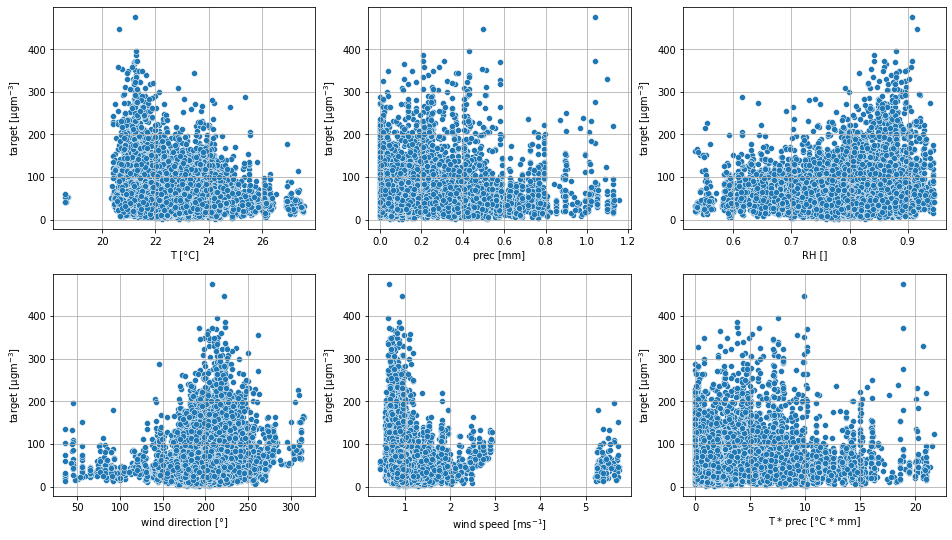

In [363]:
# scatterplots between target and feature variables
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,9))
ax = np.reshape(ax,6)
units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]','T * prec [°C * mm]']

for i,feature in enumerate(['mean_temp','mean_precip','mean_rel_humidity','mean_wind_dir','mean_wind_spd','mean_precip_temp']):
    sns.scatterplot(x=data[feature], y=data['target'], ax=ax[i])
    ax[i].grid()
    ax[i].set_ylabel('target [$\mathregular{µgm^{-3}}$]')
    ax[i].set_xlabel(units[i])
#ax[-1].remove()    


In [364]:
data.columns

Index(['ID', 'location', 'temp', 'precip', 'rel_humidity', 'wind_dir',
       'wind_spd', 'atmos_press', 'target', 'precip_temp', 'mean_temp',
       'max_temp', 'min_temp', 'std_temp', 'var_temp', 'median_temp',
       'mean_1_temp', 'mean_2_temp', 'mean_3_temp', 'mean_4_temp',
       'mean_5_temp', 'mean_4_5_temp', 'mean_3_4_5_temp', 'mean_precip',
       'max_precip', 'min_precip', 'std_precip', 'var_precip', 'median_precip',
       'mean_1_precip', 'mean_2_precip', 'mean_3_precip', 'mean_4_precip',
       'mean_5_precip', 'mean_4_5_precip', 'mean_3_4_5_precip',
       'mean_rel_humidity', 'max_rel_humidity', 'min_rel_humidity',
       'std_rel_humidity', 'var_rel_humidity', 'median_rel_humidity',
       'mean_1_rel_humidity', 'mean_2_rel_humidity', 'mean_3_rel_humidity',
       'mean_4_rel_humidity', 'mean_5_rel_humidity', 'mean_4_5_rel_humidity',
       'mean_3_4_5_rel_humidity', 'mean_wind_dir', 'max_wind_dir',
       'min_wind_dir', 'std_wind_dir', 'var_wind_dir', 'median_wind_d

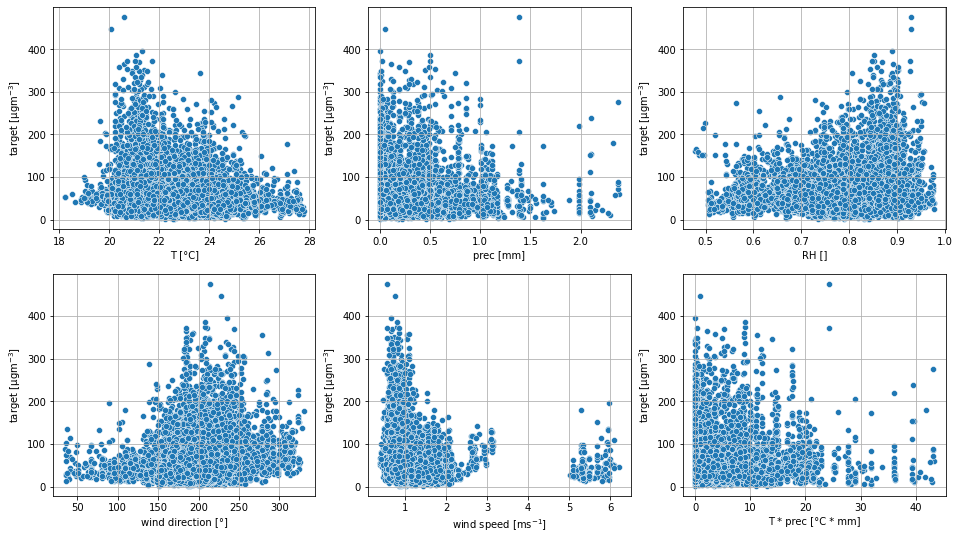

In [365]:
# scatterplots between target and feature variables
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,9))
ax = np.reshape(ax,6)
units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]','T * prec [°C * mm]']

for i,feature in enumerate(['mean_4_5_temp','mean_4_5_precip','mean_4_5_rel_humidity','mean_4_5_wind_dir','mean_4_5_wind_spd','mean_4_5_precip_temp']):
    sns.scatterplot(x=data[feature], y=data['target'], ax=ax[i])
    ax[i].grid()
    ax[i].set_ylabel('target [$\mathregular{µgm^{-3}}$]')
    ax[i].set_xlabel(units[i])
#ax[-1].remove()    


In [366]:
# # scatterplots between target and feature variables
# fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,9))
# ax = np.reshape(ax,6)
# units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]']

# for i,feature in enumerate(['mean_3_4_5_temp','mean_3_4_5_precip','mean_3_4_5_rel_humidity','mean_3_4_5_wind_dir','mean_3_4_5_wind_spd']):
#     sns.scatterplot(x=data[feature], y=data['target'], ax=ax[i])
#     ax[i].grid()
#     ax[i].set_ylabel('target [$\mathregular{µgm^{-3}}$]')
#     ax[i].set_xlabel(units[i])
# ax[-1].remove()    


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14648 entries, 1 to 15538
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14648 non-null  object 
 1   location                 14648 non-null  object 
 2   temp                     14648 non-null  object 
 3   precip                   14648 non-null  object 
 4   rel_humidity             14648 non-null  object 
 5   wind_dir                 14648 non-null  object 
 6   wind_spd                 14648 non-null  object 
 7   atmos_press              14648 non-null  object 
 8   target                   14648 non-null  float64
 9   precip_temp              14648 non-null  object 
 10  mean_temp                14648 non-null  float64
 11  max_temp                 14648 non-null  float64
 12  min_temp                 14648 non-null  float64
 13  std_temp                 14648 non-null  float64
 14  var_temp              

In [368]:
# redefine features for correlation analysis
features = [prefix + feature[5:] for feature in features for prefix in ['mean_','mean_3_4_5_','mean_4_5_','mean_5_','mean_4_','mean_3_','mean_2_','mean_1_']]

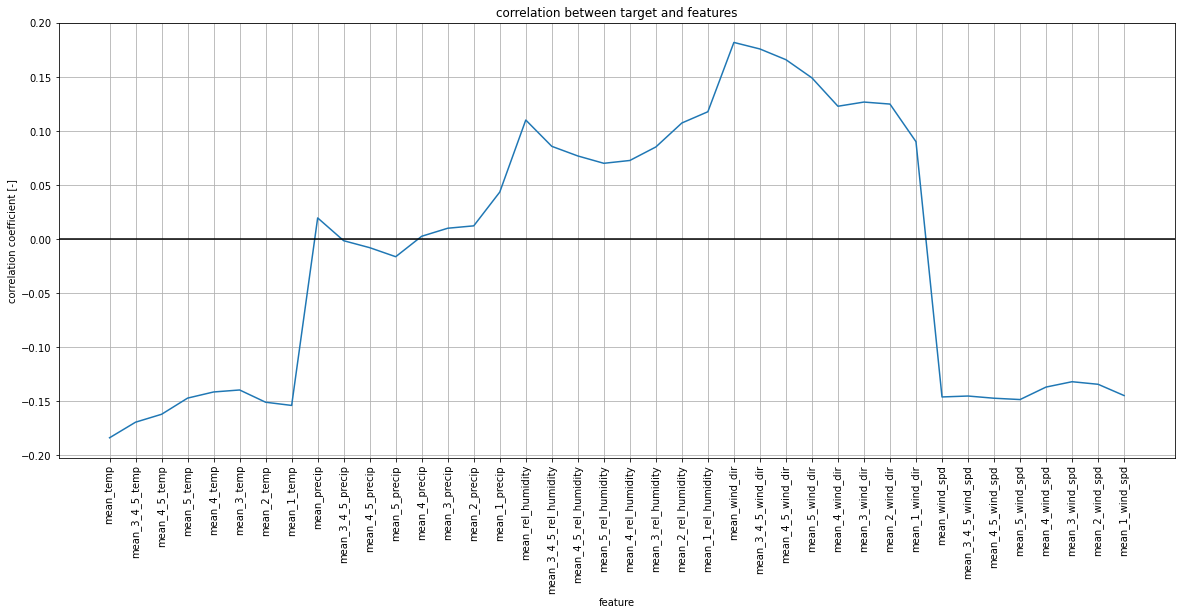

In [369]:
# corelations between features and target variable
corr = data[features + ['target']].corr()
#fig,ax=plt.subplots(figsize=(16,9))
#sns.heatmap(data=corr,ax=ax,cmap='bwr',vmin=-1.,vmax=1.,mask = np.triu(corr))

fig=plt.figure(figsize=(20,8))
plt.plot(corr['target'][:-1])
plt.grid()
plt.xticks(rotation=90);
plt.xlabel('feature')
plt.ylabel('correlation coefficient [-]')
plt.title('correlation between target and features')
plt.axhline(y=0,color='k')


In [370]:
data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,precip_temp,...,std_precip_temp,var_precip_temp,median_precip_temp,mean_1_precip_temp,mean_2_precip_temp,mean_3_precip_temp,mean_4_precip_temp,mean_5_precip_temp,mean_4_5_precip_temp,mean_3_4_5_precip_temp
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702,"[2.29839999966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1.109609,1.231233,0.0,0.189054,0.000000,0.052399,0.000000,0.481338,0.245581,0.182069
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 157.2...",...,68.915505,4749.346830,0.0,9.537275,2.963313,19.322558,71.496791,2.201859,36.142234,30.612477
5,ID_train_10000,E,"[26.225, 26.25, 26.95833333, 27.925, 28.416666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7566666670000001, 0.7090833329999999, 0.632...","[nan, 104.3737208, 161.28512859999995, 161.322...","[nan, 1.4858333330000002, 1.090833333, 0.94166...","88.56583333,88.55,88.50916667,88.44083333,88.3...",17.005000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,48.325392,2335.343544,0.0,14.678464,28.290865,0.000000,3.143684,6.491480,4.851743,3.256650
6,ID_train_10001,C,"[21.86666667, 21.38333333, 20.75, 20.74166667,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.548333333, 0.571666667, 0.589166667, 0.57, ...","[334.0827161, 332.4037603, 328.58290530000005,...","[1.1525, 1.055, 1.11, 1.385833333, 1.2, 1.2508...","87.73666667,87.74416667,87.7475,87.78,87.84833...",53.100000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,5.861297,34.354799,0.0,0.000000,0.904069,0.000000,0.000000,4.864132,2.481700,1.665799
7,ID_train_10002,A,"[28.24166667, 27.9, 26.45833333, 24.31666667, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.52725, 0.515833333, 0.585916667, 0.6965, 0....","[328.4616193, 336.5790368000001, 346.5753952, ...","[1.926666667, 1.635, 0.744166667, 0.454166667,...","88.01416667,88.01166667,88.0375,88.13083333,88...",55.051143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,82.177520,6753.144721,0.0,0.000000,0.036898,2.720118,7.987125,50.405915,29.629365,20.782489


In [371]:
#features = ["mean_4_5_temp","mean_4_5_precip","mean_4_5_rel_humidity","mean_4_5_wind_dir","mean_4_5_wind_spd"]
features = ["mean_temp","mean_precip","mean_rel_humidity","mean_wind_dir","mean_wind_spd"]

In [372]:
# export new data to csv. file
data[features + ['target']].to_csv('data/train_modelling.csv',index=False)

<AxesSubplot:>

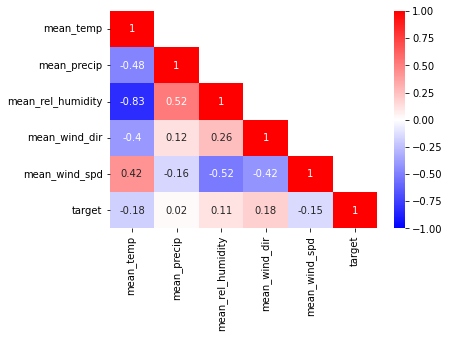

In [374]:
corr = data[features + ['target']].corr()
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        if j>i: 
            corr.iloc[i,j] = np.nan

sns.heatmap(corr,vmin=-1.,vmax=1.,cmap='bwr',annot=True)